In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import random as r
from matplotlib.lines import Line2D

In [2]:
plt.style.use('../computermodernstyle.mplstyle')

In [3]:
names = [r"Weighted", r"Mean-weighted", r"Unweighted"]
edge_colours = ["#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf"]

In [4]:
weights = np.squeeze(pd.read_csv('../../ee_to_ttbar/data/weighted_weights.csv', delimiter = ',', header=None, index_col=False).to_numpy())

In [5]:
weights_min = weights
weights_min /= np.mean(weights_min)

## Reweight with mean

In [6]:
ref_weight_mean = np.mean(weights)
p_rejection_sampling_mean = np.random.rand(len(weights))
selected_mean = np.less(p_rejection_sampling_mean, weights/ref_weight_mean)

weights_mean = weights[selected_mean]/ref_weight_mean
weights_mean[weights_mean < 1.0] = 1.0
weights_mean /= np.mean(weights_mean)

## Reweight with max

In [7]:
ref_weight_max = np.max(weights)
p_rejection_sampling_max = np.random.rand(len(weights))
selected_max = np.less(p_rejection_sampling_max, weights/ref_weight_max)

weights_max = weights[selected_max]/ref_weight_max
weights_max[weights_max < 1.0] = 1.0
weights_max /= np.mean(weights_max)

## Set up histograms

In [8]:
n_bins = 100
bins = np.linspace(np.log10(np.amin(weights_min)), np.log10(np.amax(weights_min)), n_bins+1)
vals_min, edges = np.histogram(np.log10(weights_min), bins=bins)
vals_mean, _    = np.histogram(np.log10(weights_mean), bins=bins)
vals_max, _     = np.histogram(np.log10(weights_max), bins=bins)

## Normalize

In [9]:
bin_widths = np.diff(edges)
vals_min_norm  = vals_min  / len(weights_min) / bin_widths
vals_mean_norm = vals_mean / len(weights_min) / bin_widths
vals_max_norm  = vals_max  / len(weights_min) / bin_widths

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


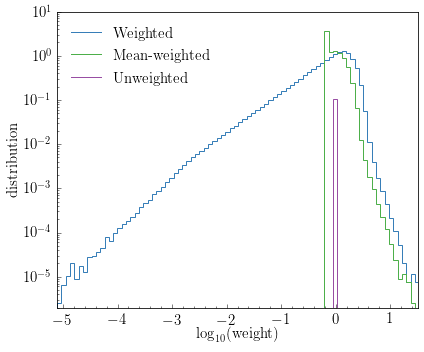

In [10]:
plt.figure().set_size_inches(6,5)
plt.yscale('log')
plt.xlim(-5.1, 1.5)
plt.ylim(2e-6, 1e1)

plt.hist(edges[:-1], edges, weights=vals_min_norm , edgecolor=edge_colours[0], label=names[0], histtype="step")
plt.hist(edges[:-1], edges, weights=vals_mean_norm, edgecolor=edge_colours[1], label=names[1], histtype="step")
plt.hist(edges[:-1], edges, weights=vals_max_norm , edgecolor=edge_colours[2], label=names[2], histtype="step")

handles, labels = plt.gca().get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
plt.legend(loc=2, handles=new_handles, labels=labels) 
plt.gca().set_xlabel(r'$\log_{10}(\mathrm{weight})$')
plt.gca().set_ylabel(r'distribution')
plt.savefig('weight_distribution.pdf', format='pdf', dpi=1000, bbox_inches = "tight")